<h1 style="padding-top: 25px;padding-bottom: 25px;text-align: left; padding-left: 10px; background-color: #DDDDDD; 
    color: black;"> <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science </h1>

## Homework 1: Data Collection, Parsing, and Quick Analyses

**Harvard University**<br/>
**Fall 2020**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, and Chris Tanner<br/>
<hr style='height:2px'>

In [1]:
## RUN THIS CELL TO GET THE RIGHT FORMATTING 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2020-CS109A/master/themes/static/css/cs109.css").text
HTML(styles)


## Overview 

In this homework, your goal is to learn how to acquire, parse, clean, and analyze data. Toward this goal, we will address certain question about COVID, and you will scrape data directly from a website. For the remainder of the semester, we will provide you data files directly; however, since real-world problems often require gathering information from a variety of sources, including the Internet, web scraping is a highly useful skill to have.

### Instructions
- To submit your assignment, follow the instructions given in Canvas.

### Learning Objectives
- Get started using Jupyter Notebooks, which are incredibly popular, powerful, and will be our medium of programming for the duration of CS109A and CS109B.
- Become familiar with how to access and use data from various sources (i.e., web scraping and directly from files).
- Gain experience with data exploration and simple analysis.
- Become comfortable with PANDAS as a means of storing and working with data.
- Reflect on what further analysis you may wish to do with this data. For example, given the material we've covered so far, what *more* do you wish you had the ability to do (e.g., modelling, prediction, etc). That is, think about questions you may have about the data, and try to imagine what types of tools you might need to help answer your questions.

### Notes
- Exercise **responsible scraping**. Web servers can become slow or unresponsive if they receive too many requests from the same source in a short amount of time. In your code, use a delay of 2 seconds between requests. This helps to not get blocked by the target website -- imagine how frustrating it would be to have this occur. Section 1 of this homework involves saving the scraped web pages to your local machine. Thus, after completing Section 1, you do not need to re-scrape any of the pages, unless you wish to occasionally grab the latest data. 

- Web scraping requests can take several minutes. This is another reason why you should not wait until the last minute to do this homework.
- As you run a Jupyter Notebook, it maintains a running state of memory. Thus, the order in which you run cells matters and plays a crucial role; it can be easy to make mistakes based on *when* you run different cells as you develop and test your code. **Before submitting every Jupyter Notebook homework assignment, be sure to restart your Jupyter Notebook and run the entire notebook from scratch, all at once (i.e., "Kernel -> Restart & Run All")**
- We will be working with COVID data. COVID has impacted everyone in the world, and naturally some people have been greatly more affected than others. We, the teaching staff, are sensitive to this, empathize, and understand that working with COVID data may be unsettling to some. We apologize for any discomfort this may cause. Our intent with this assignment is purely pedagogical, and we'd like to remind students that data science and machine learning can be used to provide insights that can be used for good and invoke change. Toward this goal, parts of the homework are intended to shed light on the unfortunate, widespread inequality that exists. So, while this data may be unsettling, our aim is for the learned skills addressed here -- and in all future assignments -- to provide you with knowledge and confidence to do good work.

## 1. Obtaining Data (17 points)

For any given situation or scenario that we wish to understand, we will rely on having relevant data. Here, we are interested in the degree to which the SARS-CoV-2 virus has affected United States citizens (SARS-CoV-2 is the virus that causes the COVID-19 disease). The Centers for Disease Control and Prevention (CDC) provides relevant data from USAFacts.org that includes the number of confirmed COVID-19 cases on a per-county basis. Visit https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/. At the bottom of the web page, in a blue table, you should see a list of every state, each of which has its own web page.

In this exercise, we will focus on automating the downloading of each state's data (via ``Requests``). First, as we will do for every Jupyter Notebook, let's import necessary packages that we will use throughout the notebook (i.e., run the cell below). 

In [2]:
# import the necessary libraries
import re
import requests
import pandas as pd
import numpy as np
from time import sleep
from bs4 import BeautifulSoup

# NOTE: files will be saved to this directory, so you need to ensure
# that it exists on your system first (it should be visible from the
# directory of where you are running this Notebook file)
# i.e.,
# >> ls
# cs109a_hw1_student.ipynb
# election2016_by_county.csv
# data/
state_dir = "data/"

In [3]:
# we define this for convenience, as every state's url begins with this prefix
base_url = 'https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/'

<div class='exercise'><b> Exercise 1.1 [1 pt]: Fetching Website data via Requests</b>

Fetch the web page located at `base_url` and save the request's returned object (a Response object) to a variable named `home_page`.
</div>

In [4]:
# YOUR CODE HERE
home_page = requests.get(base_url)
# END OF YOUR CODE HERE

<div class='exercise'><b>Exercise 1.2 [2 pts]:</b> In the cell below:
    
- Write a line of code that prints to the screen the status of `home_page` (the web page's returned object). You should receive a code of 200 if the request was successful; then,

- Write code that prints the entire contents of `home_page`</div>


In [ ]:
# YOUR CODE HERE
print('The status of our request is', home_page.status_code)
print(home_page.text)
# END OF YOUR CODE HERE

<div class='exercise'><b> Exercise 1.3 [1 pt]:</b>
    
In the cell below, create a new BeautifulSoup object that parses the `home_page` as an HTML document (can be done with 1 line of code)</div>

In [6]:
# YOUR CODE HERE
soup = BeautifulSoup(home_page.text, "html.parser")
# END OF YOUR CODE HERE

<div class='exercise'><b> Exercise 1.4 [8 pts]:</b>
    
In the cell below, write code that uses the BeautifulSoup object to parse through the home page in order to extract the link for every state. Feel free to use Regular Expressions, in conjunction with any BeautifulSoup parsing. Specifically, the goal is to populate the `state_urls` dictionary by setting each key to be the state name and the value to be the full URL. When complete, there will be 51 keys (50 states + 1 for DC).

### AS A CRITICAL EXAMPLE:###
Within `state_urls`, one of your <key, value> pairs should be:

``"District of Columbia" : "https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/state/district-of-columbia"``

The casing here is **incredibly** important because later, in Exercise 4, you will merge your data with another dataset that has casing of this form. Thus, our key here should be `District of Columbia` and not `District Of Columbia` or `district-of-columbia`.


**NOTES:**
- There are _many_ solutions, but you may find it easiest to use Regular Expression(s)
- Pay attention to the casing example above, so that your later Exercises go smoothly. 
</div>

In [7]:
# YOUR CODE HERE
html_states = soup.findAll('a', class_="jss45")
States = [html.text for html in html_states]
States_formatted = States
urls_formatted = ["https://usafacts.org"+url.get('href') for url in html_states]
state_urls = dict(zip(States_formatted, urls_formatted))
# END OF YOUR CODE HERE

Run the cell below to help ensure your formatting is correct and has 51 <key, value> pairs.

In [8]:
# SANITY CHECK
if len(state_urls.keys()) != 51 or \
state_urls["District of Columbia"] != "https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/state/district-of-columbia":
    print("** 1.4 is incorrect")
else:
    print("** 1.4 might be correct")

** 1.4 might be correct


We wish to use the data without having to re-download it every time. So, let's save each webpage to our local hard drive. **NOTE: It's probably okay to download all of the state web pages a few times a day, but it's safer to keep it to a minimum.**

<div class='exercise'><b> Exercise 1.5 [5 pts]:</b>
    
In the cell below, we will iterate through all <key, value> items in `state_urls`. Your job is to make a web request for each URL and save the **contents** out to a file on your hard drive (use `state_dir` as the prefix to the path.) 

**NOTES:**
- Leave the 2 second pause
- You should be saving to a file the actual content of the webpage, not a BeautifulSoup object. That is, you should be able to open the saved files in an editor and see the HTML code, just as you could if you were to view the webpage in your browser and click 'View Page Source'.
- See [official Python documentation](https://docs.python.org/3/tutorial/inputoutput.html#reading-and-writing-files) for details on how to read/write files to disk
- You should have saved 51 different files to your hard drive.
</div>

In [9]:
# 1.5 (4 pts) -- save each webpage to disk
for state, url in state_urls.items():
    
    # YOUR CODE HERE
    with open(state_dir + state, 'w', newline='') as f:
        state_page = requests.get(url)
        f.write(state_page.text)
    # END OF YOUR CODE HERE
    sleep(2) # LEAVE THIS IN

## 2. Loading and Exploring Data (22 pts)
Now, let's actually use the data! Fortunately, it's saved to our local machine, so we don't need to re-crawl the data every time we wish to access it. We want you to understand that PANDAS is a library of useful data structures and operations, but we also wish to remind you that it isn't magic and it isn't the _only_ way to do Data Science; it's just a tool to help, and you could do the same operations without PANDAS. Thus, here we ask you to perform a few operations without using PANDAS, and then in Exercise 3 we will use PANDAS.

**Terminology Notice:** In the United States, every state is comprised of many **counties.** You can think of a **county** as being a pretty large district. 

First, run the cell below to construct `state_info`

In [9]:
state_info = [(state, state_dir + state) for state in state_urls.keys()]

<div class='exercise'><b> Exercise 2.1 [10 pts]: Parsing and storing data</b>
    
Complete the `load_covid_data()` function, which:

- Takes as input `state_info`, which is a list of tuples: (state name, path to the corresponding file)
- Parses the contents of the file and extracts for **each county**:
    - \# of confirmed cases (total)
    - \# of deaths
    - \# of confirmed cases (per 100k)
- Stores in a **non-PANDAS** data structure named `covid_data` the above 3 pieces of data, **for every county across every state**
- Returns `county_counts`
    <font color='blue'>

**NOTES:**
- To be clear, as of September 7, 2020, the webpage for Alabama currently lists 67 counties. District of Columbia has 1 county, and Wyoming has 23. Here we are asking you to store in `covid_data` *all counties* across every state. So, later, if we were wished to access just Wyoming's information, you could easily retrieve such for each of its 23 counties, or the info for any of the 67 counties in Alabama. 
- `covid_data` **must not be a PANDAS data structure;** it must use a combination of lists and/or dictionaries. It's up to you to decide how to organize this, e.g., a lists of lists of lists, or a list of dictionaries, or a dictionary of dictionaries, or a dictionary of lists of lists, etc. A guiding decision should be ease of access for computing basic stats (Exercises 2.2, 2.3, and 2.4)
</div>

In [10]:
# parses all county-level COVID data from the
# passed-in list of (state, filepath) tuples 
def load_covid_data(state_info):
    #covid_data = {}
    # YOUR CODE HERE
    list_state = []
    list_dict = []
    for tuple_state in state_info:
        state = tuple_state[0]
        list_state.append(state)
        state_directory = tuple_state[1]
        with open(state_directory) as f:
            data = f.read()
        soup_state = BeautifulSoup(data, "html.parser")
        name_counties = [s.text for s in soup_state.findAll(class_="jss41")]
        htmls_counties = soup_state.findAll(class_="MuiTableCell-root-52 MuiTableCell-body-54 MuiTableCell-sizeSmall-56")
        numbers = [html.text for html in htmls_counties]
        stats = [numbers[i:i + 3] for i in range(0, len(numbers), 3)]
        state_stat = dict(zip(name_counties, stats))
        list_dict.append(state_stat)
    covid_data = dict(zip(list_state, list_dict))
    # END OF YOUR CODE HERE
    return covid_data

Run the cell below (no changes necessary) to execute your code above

In [11]:
covid_data = load_covid_data(state_info)

<div class='exercise'><b> Exercise 2.2 [4 pts]: Simple analytics</b>
    
Complete the `calculate_county_stats()` function, which calculates:
1. The single county (and the state to which it belongs) that has the **lowest rate** of COVID cases per 100k people
2. The single county (and the state to which it belongs) that has the **highest rate** of COVID cases per 100k people

**NOTES:**
- Place your resulting variables within the blanks of the `print()` statements that we provide
- These values you report should be Floating point numbers (e.g., 3.4), not Integers (e.g., 3).
- If there are ties, return any of the tied counties
</div>

In [14]:
def calculate_county_stats(covid_data):
    
    # YOUR CODE HERE
    running_min = 10000
    running_max = 0
    running_min_county = ""
    running_max_county = ""
    running_min_state = ""
    running_max_state = ""
    for state in covid_data.keys():
        state_dict = covid_data.get(state)
        for county in state_dict.keys():
            confirmed_cases = state_dict.get(county)[2]
            confirmed_cases = float(confirmed_cases.replace(',', ''))
            if confirmed_cases > running_max:
                running_max = confirmed_cases
                running_max_county = county
                running_max_state = state
            if confirmed_cases < running_min and confirmed_cases > 0:
                running_min = confirmed_cases
                running_min_county = county
                running_min_state= state
    # END OF YOUR CODE HERE
    print(running_min_county + "(" +running_min_state+ ")" +" has the lowest rate of confirmed COVID cases: " + str(running_min) + " per 100k")
    print(running_max_county + "(" +running_max_state+ ")" + " has the highest rate of confirmed COVID cases: " + str(running_max) + " per 100k")

Run the cell below (no changes necessary) to execute your code above

In [15]:
calculate_county_stats(covid_data)

Elk County(Kansas) has the lowest rate of confirmed COVID cases: 39.5 per 100k
Lafayette County(Florida) has the highest rate of confirmed COVID cases: 14474.0 per 100k


<div class='exercise'><b> Exercise 2.3 [4 pts]: Simple analytics</b>
    
Complete the `calculate_state_deaths()` function, which calculates:
1. The state that has the **lowest number** of deaths
2. The state that has the **highest number** of deaths

**NOTES:**
- Place your resulting variables within the blanks of the `print()` statements that we provide (don't just manually type your textual answers in the blanks)
- These values you report should be Integers, not Floating point numbers.
- If there are ties, return any of the tied counties

</div>

In [16]:
def calculate_state_deaths(covid_data):
    
    # YOUR CODE HERE
    running_min = 10000
    running_max = 0
    running_min_state = ""
    running_max_state = ""
    for state in covid_data.keys():
        state_dict = covid_data.get(state)
        state_sum = 0
        for county in state_dict.keys():
            death = state_dict.get(county)[1]
            death = int(death.replace(',', ''))
            state_sum = state_sum + death
        if state_sum > running_max:
            running_max = state_sum
            running_max_state = state
        if state_sum < running_min and state_sum > 0:
            running_min = state_sum
            running_min_state = state
    # END OF YOUR CODE HERE

    print(running_min_state + " has the fewest COVID deaths: " + str(running_min))
    print(running_max_state + " has the most COVID deaths: " + str(running_max))

Run the cell below (no changes necessary) to execute your code above

In [17]:
calculate_state_deaths(covid_data)

Alaska has the fewest COVID deaths: 42
New York has the most COVID deaths: 32604


<div class='exercise'><b> Exercise 2.4 [4 pts]: Simple analytics</b>
    
Complete the `calculate_state_deathrate()` function, which calculates:
1. The state that has the **lowest rate** of deaths based on its entire population
2. The state that has the **highest rate** of deaths based on its entire population

**NOTES:**
- To calculate a state's population, we are asserting that is sufficient to sum the population over all counties, and that each county's population can be calculated simply from the data fields stored within `covid_data`.
- **If a county has reported 0 COVID cases,** then we should ignore this county as we estimate its county population. Thus, that county would contribute 0 to its state population total.
- Round your results to the a single person (e.g., "1 out of every 2703 people has died" not 2703.4)
- Place your resulting variables within the blanks of the `print()` statements that we provide (don't just manually type your textual answers in the blanks)
</div>

In [18]:
def calculate_state_deathrate(covid_data):
    
    # YOUR CODE HERE
    running_min = 10000
    running_max = 0
    running_min_state = ""
    running_max_state = ""
    for state in covid_data.keys():
        state_dict = covid_data.get(state)
        population_state = 0
        deaths_state = 0
        for county in state_dict.keys():
            stats = state_dict.get(county)
            if float(stats[2].replace(',', '')) > 0:
                population_county = (float(stats[0].replace(',', ''))/float(stats[2].replace(',', '')))*100000
                population_state = population_state + population_county
                deaths_state = deaths_state + float(stats[1].replace(',', ''))
        rate_state = deaths_state/population_state
        if rate_state > running_max:
            running_max = rate_state
            running_max_state = state
        if rate_state < running_min and rate_state > 0:
            running_min = rate_state
            running_min_state = state
    # END OF YOUR CODE HERE
    print(running_min_state+ " has the lowest COVID death rate; 1 out of every " + str(round(running_min)) + " people has died")
    print(running_max_state + " has the highest COVID death rate; 1 out of every " + str(round(running_max)) + " people has died")

Run the cell below (no changes necessary) to execute your code above

In [19]:
calculate_state_deathrate(covid_data)

Alaska has the lowest COVID death rate; 1 out of every 5.7618573982459404e-05 people has died
New Jersey has the highest COVID death rate; 1 out of every 0.0018039556489511431 people has died


## 3. PANDAS (36 pts)
What if we wanted to observe more than just the single-most extreme counties and states? What if we wanted to inspect all states, after having sorted the data by some feature? As you saw in the above exercises, doing the most basic analytics is possible, but it can quickly become cumbersome. As we learned in class, PANDAS is a great library that provides data structures that are highly useful for data analysis.

<div class='exercise'><b> Exercise 3.1 [10 pts]: Converting to PANDAS</b>

In Exercise 2, we worked with `covid_data`, which is comprises of some combination of lists and/or dictionaries.

Complete the `convert_to_pandas()` function, which converts `covid_data` to a PANDAS DataFrame, whereby:
- Each row corresponds to a unique county
- The 5 columns are:
    - county
    - state
    - \# total covid cases (Integer)
    - \# covid cases per 100k (Integer)
    - \# covid deaths (Integer)
- The columns should be titled **exactly** as listed above

**NOTE:**
- If there exists multiple counties with the same name, each of which belonging to a different state, then there should be a distinct row for each.
- The 3 columns that correspond to COVID counts should all be Integers (e.g., 1498), not Floating point digits (e.g., 1498.0)
</div>

In [20]:
def convert_to_pandas(covid_data):
    # YOUR CODE HERE
    usa_data = [] 
    for state in covid_data:
        state_information = covid_data.get(state)
        for county in state_information:
            values = state_information.get(county)
            county_features=[str(county), str(state), int(values[0].replace(',', '')), float(values[2].replace(',', '')), int(values[1].replace(',', ''))]
            usa_data.append(county_features)      
    covid_df = pd.DataFrame(data = np.asarray(usa_data), columns = ['county', 'state', '# total covid cases', '# covid cases per 100k', '# covid deaths']) 
    # END OF YOUR CODE HERE
    return covid_df

Run the cell below (no changes necessary) to execute your code above

In [21]:
covid_df = convert_to_pandas(covid_data)
covid_df

,county,state,# total covid cases,# covid cases per 100k,# covid deaths
0,Autauga County,Alabama,1551,2776.1,24
1,Baldwin County,Alabama,4886,2188.7,47
2,Barbour County,Alabama,786,3184.0,7
3,Bibb County,Alabama,602,2688.2,9
4,Blount County,Alabama,1441,2492.0,12
...,...,...,...,...,...
3137,Sweetwater County,Wyoming,320,755.7,2
3138,Teton County,Wyoming,462,1969.0,1
3139,Uinta County,Wyoming,310,1532.7,2
3140,Washakie County,Wyoming,111,1422.2,6


In [22]:
covid_df.dtypes

county                    object
state                     object
# total covid cases       object
# covid cases per 100k    object
# covid deaths            object
dtype: object

In [26]:
covid_df= covid_df.astype(dict(zip(covid_df.columns, [str, str, int, float, int])))

In [27]:
covid_df.dtypes

county                     object
state                      object
# total covid cases         int32
# covid cases per 100k    float64
# covid deaths              int32
dtype: object

<div class='exercise'><b> Exercise 3.2 [5 pts]: Simple analytics</b>

Complete the `calculate_county_stats2()` function, **which should obtain identical information as problem 2.2, but now using the PANDAS `covid_df` DataFrame.**

That is, it should calculates:
1. the single county (and the state to which it belongs) that has the **lowest rate** of COVID cases per 100k people
2. the single county (and the state to which it belongs) that has the **highest rate** of COVID cases per 100k people

**NOTES:**
- If there are ties, return any of the tied counties
- Place your resulting variables within the `print()` statements that we provide (don't just manually type your textual answers in the blanks)
- The values you report should be Floating point numbers (e.g., 3.4), not Integers (e.g., 3).

</div>

In [28]:
def calculate_county_stats2(covid_df):

    # YOUR CODE HERE
    county_lowest = covid_df[covid_df['# covid cases per 100k'] > 0].min()
    name_lowest, value_lowest, state_lowest = county_lowest['county'], county_lowest['# covid cases per 100k'], county_lowest['state']
    county_largest = covid_df[covid_df['# covid cases per 100k'] > 0].max()
    name_largest, value_largest, state_largest = county_largest['county'], county_largest['# covid cases per 100k'], county_largest['state']
    # END OF YOUR CODE HERE
    print(str(name_lowest) + " (" + str(state_lowest) + ") has the lowest rate of confirmed COVID cases: " + str(value_lowest) + " per 100k")
    print(str(name_largest) + " (" +str(state_largest) + ") has the highest rate of confirmed COVID cases: " + str(value_largest) + " per 100k")

Run the cell below (no changes necessary) to execute your code above

In [29]:
calculate_county_stats2(covid_df)

Abbeville County (Alabama) has the lowest rate of confirmed COVID cases: 39.5 per 100k
Ziebach County (Wyoming) has the highest rate of confirmed COVID cases: 14474.0 per 100k


Note: The results are consistent, we just output different counties from 2.2 because there were ties.

<div class='exercise'><b> Exercise 3.3 [5 pts]: Simple analytics</b>
    
Complete the `calculate_state_deaths2()` function, **which should obtain identical information as problem 2.3, but now using the PANDAS `covid_df` DataFrame.**
1. the state that has the **lowest number** of deaths
2. the state that has the **highest number** of deaths

**NOTES:**
- If there are ties, return any of the tied counties
- Place your resulting variables within the `print()` statements that we provide (don't just manually type your textual answers in the blanks)
- The values you report should be Integers, not Floating point numbers.
</div>

In [30]:
def calculate_state_deaths2(covid_df):
    
    # YOUR CODE HERE
    stats = covid_df.groupby('state').sum()['# covid deaths']
    min_state, min_value = stats.idxmin(), stats.min()
    max_state, max_value = stats.idxmax(), stats.max()
    # END OF YOUR CODE HERE
    print(str(min_state) + " has the fewest COVID deaths: " + str(min_value))
    print(str(max_state) + " has the most COVID deaths: " + str(max_value))

Run the cell below (no changes necessary) to execute your code above

In [31]:
calculate_state_deaths2(covid_df)

Alaska has the fewest COVID deaths: 42
New York has the most COVID deaths: 32604


<div class='exercise'><b> Exercise 3.4 [5 pts]: Simple analytics</b>
    
Complete the `calculate_state_deathrate2()` function, **which should obtain identical information as problem 2.4, but now using the PANDAS `covid_df` DataFrame.**

1. The state that has the **lowest rate** of deaths based on its entire population
2. The state that has the **highest rate** of deaths based on its entire population

**NOTES:**
- Just as in, 2.4, to calculate a state's population, we are asserting that is sufficient to sum the population over all counties -- and that each county's population can be calculated simply from the data fields stored within `covid_data`.
- Just as in 2.4, counties with 0 COVID cases should contibute 0 to the total population of the state.
- Round your results to the a single person (e.g., "1 out of every 2703 people has died" not 2703.4)
- Place your resulting variables within the blanks of the `print()` statements that we provide (don't just manually type your textual answers in the blanks)
</div>

In [32]:
covid_df

,county,state,# total covid cases,# covid cases per 100k,# covid deaths
0,Autauga County,Alabama,1551,2776.1,24
1,Baldwin County,Alabama,4886,2188.7,47
2,Barbour County,Alabama,786,3184.0,7
3,Bibb County,Alabama,602,2688.2,9
4,Blount County,Alabama,1441,2492.0,12
...,...,...,...,...,...
3137,Sweetwater County,Wyoming,320,755.7,2
3138,Teton County,Wyoming,462,1969.0,1
3139,Uinta County,Wyoming,310,1532.7,2
3140,Washakie County,Wyoming,111,1422.2,6


In [33]:
def calculate_state_deathrate2(covid_df):
    
    # YOUR CODE HERE
    # get the population of every state
    populations = np.asarray(100000*(covid_df['# total covid cases'].values/covid_df['# covid cases per 100k'].values))
    populations = [0 if num!=num else round(num) for num in populations]
    covid_df['population'] = populations
    stats_deathrate = covid_df.groupby('state').sum()
    deathrates = stats_deathrate['# covid deaths'].values/stats_deathrate['population'].values
    stats_deathrate['deathrate'] = deathrates
    min_state, min_value = stats_deathrate['deathrate'].idxmin(), stats_deathrate['deathrate'].min()
    max_state, max_value = stats_deathrate['deathrate'].idxmax(), stats_deathrate['deathrate'].max()
    # END OF YOUR CODE HERE
    print(str(min_state) + " has the lowest COVID death rate; 1 out of every " + str(round(1/min_value)) + " people has died")
    print(str(max_state) + " has the highest COVID death rate; 1 out of every " + str(round(1/max_value)) + " people has died")

Run the cell below (no changes necessary) to execute your code above

In [34]:
calculate_state_deathrate2(covid_df)

Alaska has the lowest COVID death rate; 1 out of every 5.7618701384220705e-05 people has died
New Jersey has the highest COVID death rate; 1 out of every 0.00180395573277497 people has died


C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


Note: We throw an invalid value because some counties have 0 covid cases per 100k. We deal with that problem later by dropping these counties. We could filter the Warning but we decided to leave it as is for now. 


In [33]:
covid_df

,county,state,# total covid cases,# covid cases per 100k,# covid deaths,population
0,Autauga County,Alabama,1551,2776.1,24,55870
1,Baldwin County,Alabama,4886,2188.7,47,223238
2,Barbour County,Alabama,786,3184.0,7,24686
3,Bibb County,Alabama,602,2688.2,9,22394
4,Blount County,Alabama,1441,2492.0,12,57825
...,...,...,...,...,...,...
3137,Sweetwater County,Wyoming,320,755.7,2,42345
3138,Teton County,Wyoming,462,1969.0,1,23464
3139,Uinta County,Wyoming,310,1532.7,2,20226
3140,Washakie County,Wyoming,111,1422.2,6,7805


These are highly alarming and tragic statistics, and doing calculations like this can really put the severity of the virus into a grounded perspective. In order to perfectly understand the virus and its spread, everyone would be tested and we would have contact tracing. Without getting into socio-political issues, our point is that (1) we wish to better understand the virus' effects; (2) naturally, any real-world data is messy, and thus we will never have _perfect_ data.


Let's now attempt to understand _some_ of the uncertainty around our COVID data. It's reasonable to believe that the # of COVID deaths is fairly reliable. That is, there are inevitably some false negatives -- people who died of COVID but were not accounted for, as other conditions were listed as the cause. However, the number of false positives is probably minimal -- if someone was denoted as dying from COVID, it's probably true. It's also the case that every disease has a mortality rate. For example, if 1,000 randomly-selected people contracted COVID, $N\%$ of them will die. We'd imagine that this percentage should be pretty constant throughout all people in the United States. Of course, we can think of reasons for this rate to not be perfectly consistent, as some people are at higher risk (e.g., older folks, people with pre-existing conditions, etc). Yet, we can imagine that this natural *variance* in the population to be fairly uniform throughout the USA at large. To this end, if all counties were equal in their **testing**, we ought to see a consistent ratio between: (a) the # of people who died from COVID; and (b) the # of people who tested positive for COVID. Within the medical domain, this ratio is referred to as the `case_fatality_rate`. For example, if 750 people tested positive for COVID, and 75 of those people died, then our `case_fatality_rate` would be 0.1 (meaning 10%).

<div class='exercise'><b>Exercise 3.5 [5 pts]: Further analytics</b>
    
Complete the `add_death_stats()` function below, which should add 2 new columns:
- `case_fatality_rate` and
- `# covid deaths per 100k`

And return the updated DataFrame **sorted by case_fatality_rate in ascending order** 

**NOTES:**

- `add_death_stats()` should return a new DataFrame that has 8 columns:
    - county
    - state
    - population
    - \# total covid cases
    - \# covid cases per 100k
    - \# total covid deaths
    - \# covid deaths per 100k
    - case_fatality_rate
- DataFrame should be sorted by `case_fatality_rate` in ascending order
- Again, the values for `case_fatality_rate` should be < 1. A value of 1 would mean that 100% of people who tested positive for COVID also died.
- `# covid deaths per 100k` is simply defined as the # of COVID deaths for every 100,000 people. We calculate this on a per-county basis.
</div>

In [37]:
def add_death_stats(covid_df):
    
    # YOUR CODE HERE
    covid_death_per100 = (covid_df['# covid deaths'].values/covid_df['population'].values)*100000
    covid_df['# covid deaths per 100k'] = covid_death_per100
    case_fatality_rate = covid_df['# covid deaths'].values/covid_df['# total covid cases'].values
    covid_df['case_fatality_rate'] = case_fatality_rate
    covid_df.replace(np.nan, 0, inplace=True)
    covid_df.sort_values(by = 'case_fatality_rate', axis = 0, ascending = True, inplace=True)
    covid_df= covid_df.astype(dict(zip(covid_df.columns, [str, str, int, float, int, int, float, float])))
    # END OF YOUR CODE HERE
    return covid_df

Run the cell below (no changes necessary) to execute your code above

In [38]:
covid_updated = add_death_stats(covid_df)
covid_updated

C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


,county,state,# total covid cases,# covid cases per 100k,# covid deaths,population,# covid deaths per 100k,case_fatality_rate
3141,Weston County,Wyoming,21,303.2,0,6926,0.000000,0.000000
2418,Spink County,South Dakota,78,1223.3,0,6376,0.000000,0.000000
2419,Stanley County,South Dakota,23,742.4,0,3098,0.000000,0.000000
2420,Sully County,South Dakota,8,575.1,0,1391,0.000000,0.000000
2990,Whitman County,Washington,961,1918.0,0,50104,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2098,Monroe County,Ohio,106,776.3,18,13655,131.819846,0.169811
1864,Orleans County,New York,320,793.0,55,40353,136.297177,0.171875
1190,Waldo County,Maine,73,183.8,14,39717,35.249389,0.191781
1721,Perkins County,Nebraska,32,1106.9,9,2891,311.310965,0.281250


<div class='exercise'><b> Exercise 3.6 [6 pts]: Reflection:</b> Data Analysis allows us to better understand a system or scenario.
</div>

<div class='exercise'><b>Exercise 3.6: Q1 (2  of 6 pts)</b>
    
Having looked at the results from Exercises 3.3, 3.4, and 3.5, what are some trends you've noticed and any conclusions you have? (2-3 sentences)?</div>

YOUR RESPONSE HERE

<div class='exercise'><b>Exercise 3.6: Q2 (2 of 6 pts)</b>
    
Having looked at the results from Exercise 3.5 (i.e., `covid_updated` DataFrame), do you think the original data is reliable and accurate? Are there any potential biases that you're aware of or concerned about? Please explain (3-5 sentences).</div>

There are some inconsistencies in the DataSet:
There are some states where we believe the number of covid deaths is not reliable. Let's take for instance the state of Whitman County, where 961 covid cases where reported but 0 deaths were caused by COVID: this looks inaccurate. Let us further investigate this trend. 

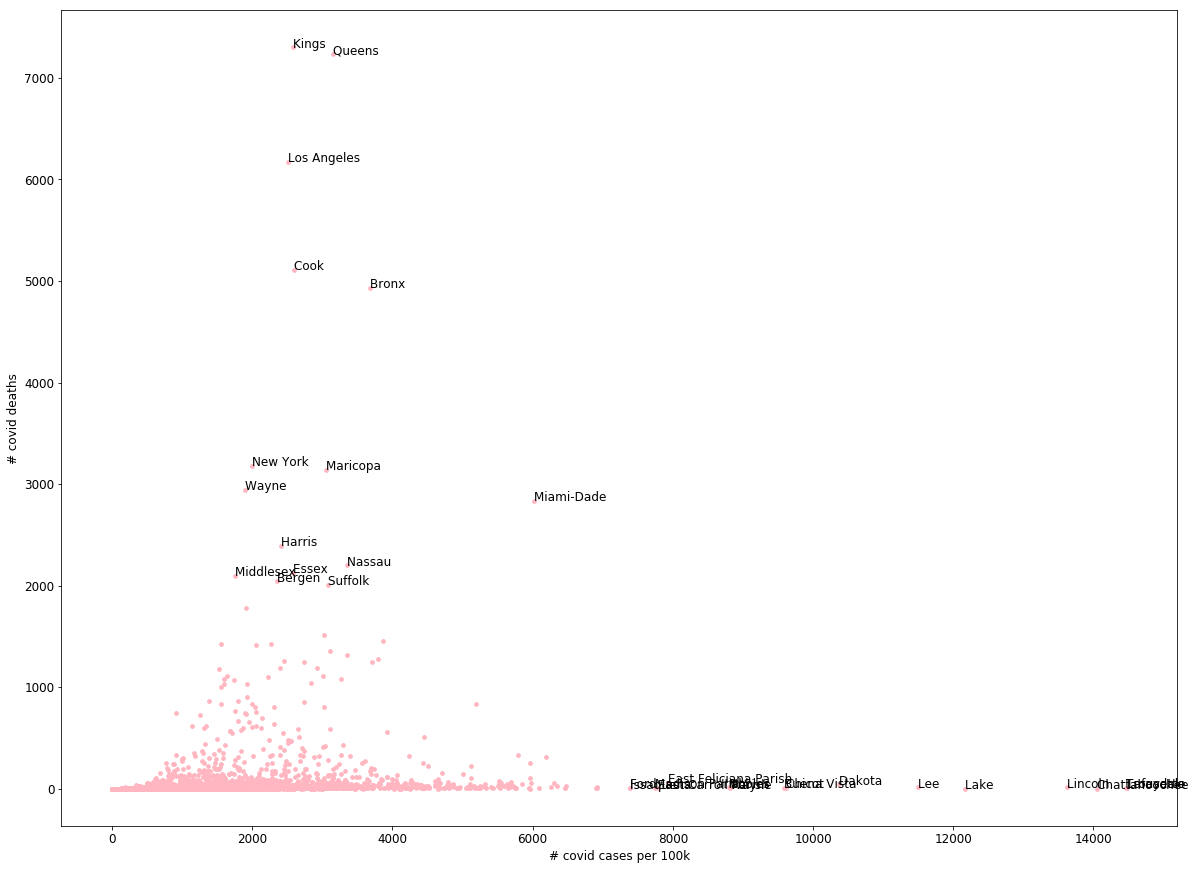

In [83]:
plt.rcParams['font.size'] = 12
fig, ax = plt.subplots(figsize = (20, 15))
covid_df[['# covid cases per 100k', '# covid deaths']].plot('# covid cases per 100k', '# covid deaths', kind='scatter', ax=ax, color = 'lightpink', s=14)
plot_df = covid_df[['# covid cases per 100k', '# covid deaths']]
plot_df.index = [name.replace('County', '') for name in covid_df['county']] #for visualization purposes
outliers = plot_df[(plot_df['# covid cases per 100k'] > 7000) | (plot_df['# covid deaths'] > 2000)]
for k, v in outliers.iterrows():
    ax.annotate(k, v)

A first way of checking for data consistency would be to further investigate the results for all the outliers we have emphasized. I strongly doubt that the right hand points with a high number of covid cases per 100k with almost 0 deaths are reliable. It is either a small county with very low population or a problem with data collection (manual error or statistics error). We can solve quickly this problem of comparing the population of a county with another figure.

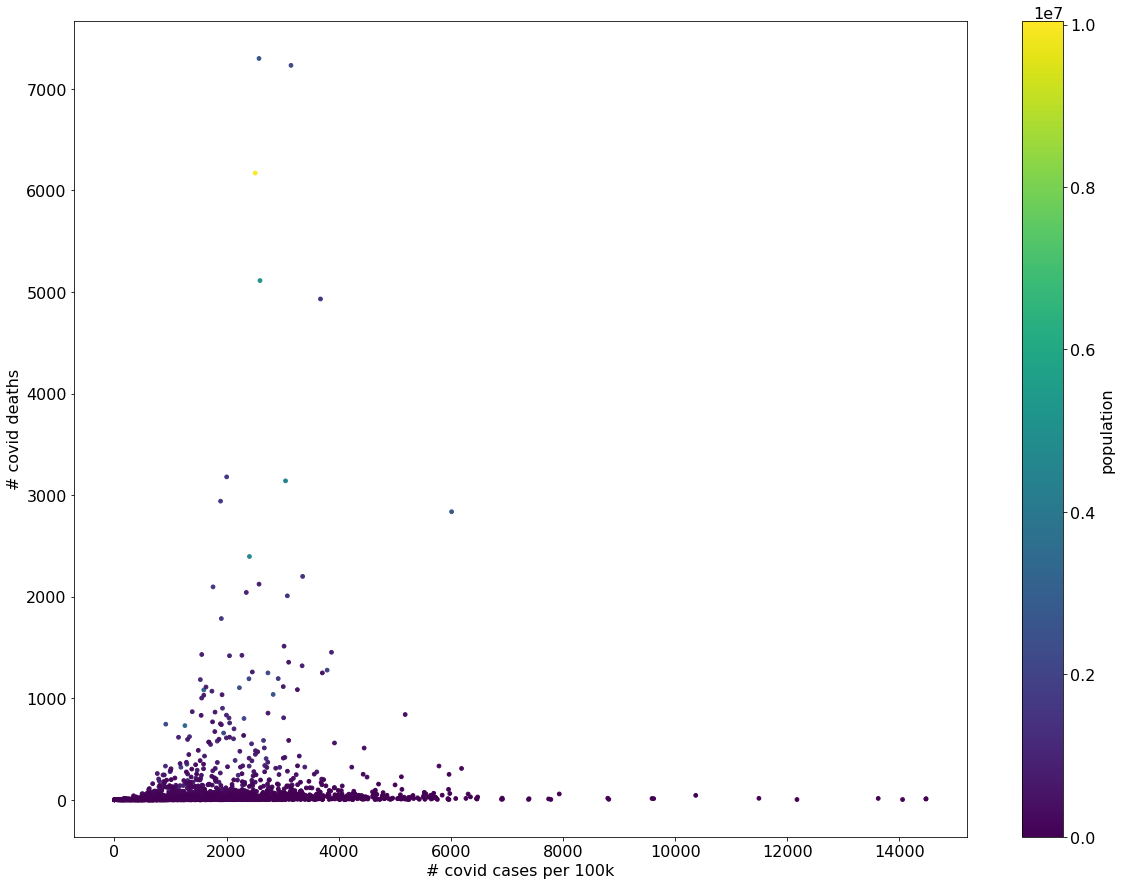

In [81]:
plt.rcParams['font.size'] = 16
fig, ax = plt.subplots(figsize = (20, 15))
covid_df.plot.scatter(x = '# covid cases per 100k', y = '# covid deaths', c = 'population', ax=ax, s=14, cmap='viridis')


As a sanity check, we can see that the right outliers are counties with a very low population. We can't treat them like counties with high population.

YOUR RESPONSE HERE

<div class='exercise'><b>Exercise 3.6: Q3 (1 of 6 pts)</b>
    
If a county has 15 confirmed deaths, how many cases would you expect? What would you expect its population to be? Explain why (1-2 sentences in total)?

**NOTE:** For this question, we aren't evaluating the accuracy of your answer but your thought-process and reasoning.
</div>

In [85]:
import seaborn as sns

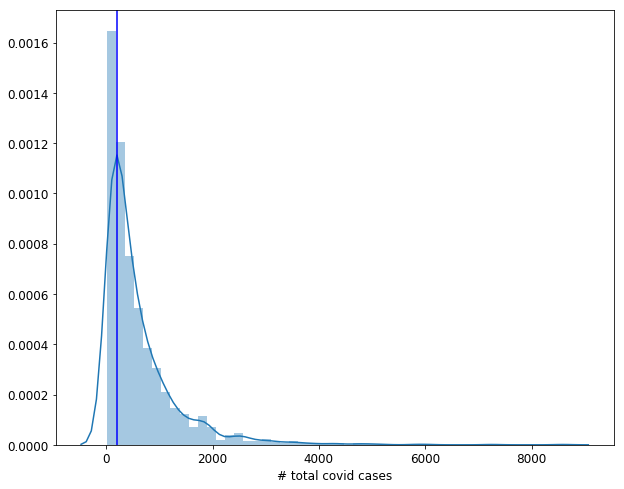

In [106]:
sample = covid_df[(covid_df['# covid deaths'] > 0) & (covid_df['# covid deaths'] < 50)]
plt.figure(figsize = (10, 8))
sns.distplot(sample['# total covid cases'])
plt.axvline(x = 200, color='blue')

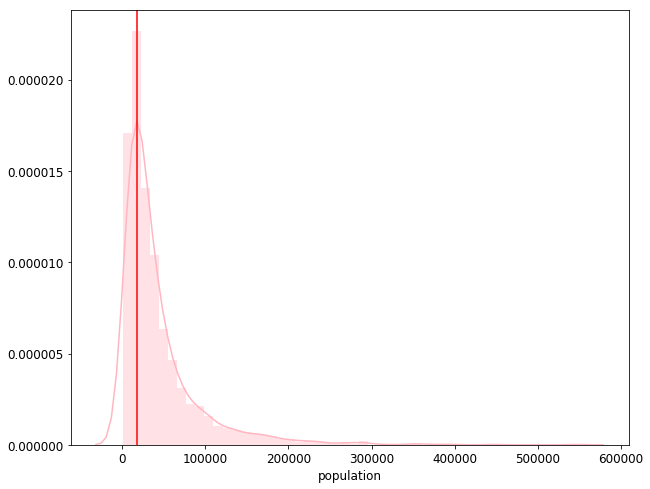

In [105]:
plt.figure(figsize = (10, 8))
sns.distplot(sample['population'], color='lightpink')
plt.axvline(x = 18000, color='red')

From what we have seen before, I am strongly convinced that we need to treat counties with number of covid deaths separately from the ones that have a low number of covid deaths: this is why I accounted for counties between 0 and 50 deaths (50 is arbitrary, can be fine-tuned later). From both plots, I expect the number of total covid cases to be 200 and the county to have 18 000 inhabitants (we could find confidence interval from our modelling by computing the percentiles of the distributions).

YOUR RESPONSE HERE

<div class='exercise'><b>Exercise 3.6: Q4 (1 of 6 pts)</b>
    
What further questions do you wish to answer about COVID, including ones that may not be possible to answer from this data alone (e.g., Is there a correlation between the average age of people in a county and the # of COVID deaths)? Write at least 3 of your questions.</div>

- First, the suggested question is a very interesting question. Since young people tend to move to urban cities, we can maybe assume that rural cities with a low number of inhabitats are essentially composed of old people. Maybe this is why counties with low number of inhabitants behave differently. Therefort, correlation between population's age and covid cases/deaths is a question that needs to be answered.
- Second, and fairly related to the first one, can we assume the covid testing is uniform accross population ? Whether it is by age or by location ? 
- Third, since sanitary measures are not applied equally in all of the States of the US, I would like to have an indicator

YOUR RESPONSE HERE

## 4. MORE DATA (25 pts)
In order to better understand how COVID (and the testing thereof) has impacted our world, we could look at how it relates to demographics, income, education, health, and political voting. For this exercise, we will make use of `election2016_by_county.csv`.

<div class='exercise'><b>Exercise 4.1 [4 pts]: Load more data</b>

Complete the `merge_data()` function, which should:
1. First, load `election2016_by_county.csv` as a new DataFrame.
2. Then, using the state and county names (case-sensitive) in both DataFrames, merge this new DataFrame with your existing `covid_updated`.
3. Return the merged DataFrame

The returned `merged` DataFrame should contain all 7 columns from `covid_updated`:
- county
- state
- \# total covid cases
- \# covid cases per 100k
- \# covid deaths
- population
- case_fatality_rate

along with these 14 columns from `election2016_by_county.csv`:
- hispanic
- minority
- female
- unemployed
- income
- nodegree
- bachelor
- inactivity
- obesity
- density
- cancer
- votergap
- trump
- clinton

**NOTES:**
- We are dropping two columns from `election2016_by_county.csv`:
    - fipscode
    - population
- Do not attempt to manually fix any of the state or county names. That is, **our merging should require the state and county names to be identical (case-sensitive) between the two DataFrames.** If there is a discrepancy between the two, do not worry about adjusting these names to find a perfect match.

**HINT:** there are many ways to solve this, but you may find the [pandas.merge()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) function can be really helpful
</div>

In [56]:
def merge_data(covid_updated, filepath):
    
    # YOUR CODE HERE
    df_new = pd.read_csv(filepath)
    df_new.drop(['fipscode', 'population'], axis=1, inplace=True)
    covid_merged = covid_updated.merge(df_new, on = ['state', 'county'])
    # END OF YOUR CODE HERE
    return covid_merged

Run the cell below (no changes necessary) to execute your code above

In [57]:
merged = merge_data(covid_updated, 'election2016_by_county.csv')

As mentioned above, the merging requires exact matching between the two DataFrames' `state` and `county` columns. Thus, some mismatches will occur, yielding our `merged` DataFrame to have fewer rows than `covid_updated` and `election2016_by_county.csv`.

<div class='exercise'><b>Exercise 4.2 [5 pts]: Data Construction / Understanding</b>
</div>

<div class='exercise'><b>Exercise 4.2: Q1 (1 of 5 pts)</b>
    
Compared to `covid_updated`, how many rows were lost during this merging process to create `merged`? Running the cell below should print to the screen your answer.
</div>

In [58]:
# YOUR CODE HERE
print(covid_updated.shape[0] - merged.shape[0], 'lines were lost during the merging')
# END OF YOUR CODE HERE

63 lines were lost during the merging


<div class='exercise'><b>Exercise 4.2: Q2 (2 of 5 pts)</b>  

List the county and state of *at least 3* such rows that exist in `covid_updated` but didn't make it into `merged`. Running the cell below should print to the screen your answer.
</div>

In [68]:
# YOUR CODE HERE
new_counties = merged['county'].values
old_counties = covid_updated['county'].values
idx_lost_counties = []
for i, old_county in enumerate(old_counties):
    if old_county not in new_counties:
        idx_lost_counties.append(i)
df_dropped = covid_updated.iloc[idx_lost_counties]
names_dropped = df_dropped[['county', 'state']]
names_dropped

# YOUR CODE HERE

,county,state
548,Kalawao County,Hawaii
2947,"Staunton, City of",Virginia
76,Hoonah–Angoon Census Area,Alaska
81,Kusilvak Census Area,Alaska
2943,"Radford, City of",Virginia
...,...,...
2928,"Galax, City of",Virginia
2923,"Emporia, City of",Virginia
2920,"Colonial Heights, City of",Virginia
2925,"Falls Church, City of",Virginia


In [69]:
print(names_dropped['state'].value_counts())

Virginia         38
Alaska           14
Hawaii            2
Colorado          2
Massachusetts     1
California        1
Louisiana         1
South Dakota      1
Missouri          1
Nevada            1
New Mexico        1
Name: state, dtype: int64


<div class='exercise'><b>Exercise 4.2: Q3 (2 of 5 pts)</b>  
? If we needed to be highly thorough and needed comprehensive data coverage, do you have any suggestions on how we could quickly, soundly fix most or all of them? (Write 2-3 sentences.)
    
<b>NOTE: Please do not actually fix these mismatches; for this Exercise, it's okay that the `merged` DataFrame is smaller than `covid_updated`</b>
</div>

According to the last thing I printed, we can see that two states are especially concerned (~80% of the total missing coiunties): Virginia and Alaska. In order to quickly fix the problem with these states we could try to rescape the data for these states and counties. We could also work with the same data and pay a careful attention of why the merging failed with these counties (if the cause is missing data: get the data from other means, if the cause is inconsistency, solve this inconsistency). I believe that the inconsistency comes from the fact that the new dataframe drawn from the new source did not report counties with 0 cases (since Virginia and Alaska are states with a relatively low number of cases).

This past example demonstrates how easy it is for data to become messy. It also shows the importance of paying close attention to your data in order to understand what you are working with.

Our `case_fatality_rate` column can be viewed as an approximation of how effective and thorough *COVID testing* is for a given county.

Our `# covid deaths` column can be viewed as an extreme indication of how severe *COVID* has impacted a given county.

Our `# covid cases per 100k` column be viewed as middle-ground between the two aforementioned features. That is, it measures the impact of the disease and is influenced by the thoroughness of COVID testing.

Using these three informative features, we can inspect how impacted each county is, while correlating this with other features of each county, such as income-level, health metrics, demographics, etc. 

<div class='exercise'><b>Exercise 4.3 [2 pts]: Cleaning the data</b>

Before we do any further analysis, we first notice that some counties haven't encountered a single COVID death (usually ones with very small populations), thus providing us with little information. Write code in the cell below to update the `merged` DataFrame so that all rows with 0 deaths are removed.

In [73]:
# YOUR CODE HERE
merged = merged[merged['# covid deaths']>0]
merged
# END OF YOUR CODE HERE

,county,state,# total covid cases,# covid cases per 100k,# covid deaths,population,# covid deaths per 100k,case_fatality_rate,hispanic,minority,...,income,nodegree,bachelor,inactivity,obesity,density,cancer,votergap,trump,clinton
563,Summit County,Utah,905,2147.3,1,42146,2.372704,0.001105,11.723,4.673,...,92560,6.7,50.1,11.1,14.4,10.9,165.7,-15.353,35.564,50.916
564,Russell County,Alabama,1678,2895.1,2,57960,3.450656,0.001192,5.285,47.987,...,35585,18.7,15.5,30.7,36.4,82.6,216.4,-1.918,48.129,50.047
565,Chattahoochee County,Georgia,1533,14055.2,2,10907,18.336848,0.001305,15.676,28.352,...,45933,7.0,31.5,24.5,27.3,45.3,70.0,11.055,53.902,42.847
566,La Crosse County,Wisconsin,1523,1290.5,2,118016,1.694685,0.001313,1.806,8.258,...,49790,6.0,30.8,19.9,28.3,253.8,182.6,-9.585,42.023,51.608
567,Effingham County,Illinois,726,2134.8,1,34008,2.940485,0.001377,1.909,2.037,...,52578,8.7,20.2,21.9,31.8,30.2,278.4,60.489,78.110,17.621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3074,Monroe County,Ohio,106,776.3,18,13655,131.819846,0.169811,0.479,2.158,...,40646,14.2,10.3,35.4,36.8,252.1,220.3,46.874,71.508,24.634
3075,Orleans County,New York,320,793.0,55,40353,136.297177,0.171875,4.829,9.935,...,46577,14.2,16.2,22.8,28.5,459.3,167.3,43.386,69.262,25.876
3076,Waldo County,Maine,73,183.8,14,39717,35.249389,0.191781,1.320,3.246,...,46598,8.1,29.0,21.0,28.3,13.3,263.3,-0.283,45.859,46.142
3077,Perkins County,Nebraska,32,1106.9,9,2891,311.310965,0.281250,3.940,1.868,...,56080,8.2,20.7,26.2,24.5,6.4,349.9,73.484,84.767,11.283


Running `.describe()` allows us to quickly see summary statistics of our DataFrame

In [74]:
merged.describe()

,# total covid cases,# covid cases per 100k,# covid deaths,population,# covid deaths per 100k,case_fatality_rate,hispanic,minority,female,unemployed,income,nodegree,bachelor,inactivity,obesity,density,cancer,votergap,trump,clinton
count,2516.000000,2516.000000,2516.000000,2.516000e+03,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.00000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2493.000000,2512.000000,2512.000000,2512.000000
mean,2474.819952,1798.199722,75.258744,1.257741e+05,45.626471,0.026785,9.816100,16.278134,50.074581,5.660135,47103.58903,15.571542,20.148490,26.136208,31.194237,262.569793,227.035981,29.237906,62.374451,33.136546
std,9386.845363,1390.783858,352.872137,3.680248e+05,50.045528,0.023465,14.315945,16.269188,2.126158,1.887687,12327.32682,6.833376,9.041991,5.302063,4.562355,1859.607025,54.582707,30.134800,15.267755,14.989941
min,6.000000,59.700000,1.000000,4.040000e+02,0.910191,0.001105,0.426000,1.253000,28.479000,1.800000,21658.00000,1.900000,6.000000,8.100000,11.800000,0.100000,46.200000,-88.725000,4.122000,6.883000
25%,197.000000,851.775000,3.000000,1.636875e+04,12.792197,0.011799,2.246750,4.784750,49.657000,4.400000,38482.50000,10.400000,13.800000,22.700000,28.500000,22.075000,192.900000,12.697500,53.910750,21.816750
50%,511.500000,1462.900000,10.000000,3.494200e+04,28.520506,0.020297,4.244000,9.570000,50.490500,5.400000,45057.00000,14.300000,17.700000,26.000000,31.300000,51.750000,228.900000,35.551000,65.171500,29.796000
75%,1446.250000,2374.975000,33.000000,9.124725e+04,58.692183,0.034358,10.087000,22.707500,51.121250,6.600000,52611.00000,20.000000,24.300000,29.700000,34.100000,130.300000,262.500000,51.745750,73.694500,41.608000
max,252066.000000,14474.000000,7299.000000,1.003927e+07,484.805487,0.333333,95.824000,93.411000,56.739000,24.000000,122641.00000,53.300000,72.000000,41.400000,47.600000,69468.400000,458.300000,83.972000,90.855000,92.847000


Using the information reported from `.describe()`, we can imagine dividing our DataFrame into 4 separate bins, based on the distribution for any given feature. Specifically, based on a particular feature:
- the $1^{st}$ bin will be the data that has values between the **min** and **25%**
- the $2^{nd}$ bin will be the data that has values between **25%** and **50%**
- the $3^{rd}$ bin will be the data that has values between **50%** and **75%**
- the $4^{th}$ bin will be the data that has values between **75%** and **max**

<div class='exercise'><b>Exercise 4.4 [3 pts]: Partitioning our data</b>
    
Complete the `partition_df()` function, which takes as input:
- DataFrame to work with
- feature (e.g., obesity) to filter by
- minimum value
- maximum value

and outputs:
- a subset of the DataFrame that has values between the passed-in minimum and maximum values (inclusively) for the passed-in feature.

For example, if we called `partition_df(merged, 'obesity', 30, 45)`, it should return a subset of the `merged` DataFrame that has obesity values between 30 and 45 (and including the boundary values of 30 and 45).
</div>

In [77]:
def partition_df(df, column_name, min, max):
    # YOUR CODE HERE
    return df[(df[column_name] >= min) & (df[column_name] <= max)]
    # END OF YOUR CODE HERE

<div class='exercise'><b>Exercise 4.5: [4 pts] Exploratory Data Analysis</b>
    
Identify a few features that you're interested in, and inspect if there's any correlation with the COVID data. Specifically, simply run your `partition_df()` function below, many times, each with a different subset of the data -- select a range of values and a particular feature. For example, if I'm interested in __cancer__, I could look at the 4 quartiles (per `.describe()`) and use those ranges of values as I repeatedly execute `partition_df()`. For this exercise, after running the function several times, **write 3-5 sentences about any patterns or correlations you noticed or didn't notice but expected to find.**
</div>

In [ ]:
# YOUR CODE HERE
# END OF YOUR CODE HERE

#partition_df(merged, 'your feature here', your_min_value, your_max_va).describe()

*Your answer here*

`.describe()` provides these nice summary statistics over any portion of data that we give it. Instead of iteratively inspecting several subsets of the data, let's actually split our DataFrame into new categories; instead of representing all features by floating point numbers, let's create new _categorical_ names for feature(s) based on their numbers. The code below does just this. It creates a new column, `income group` that has 4 possible values, each one corresponding to a quartile of the original `income` values. 

Run the cell below.

In [79]:
bins = [0, 38000, 45000, 52000, 200000]
names = ['income-group-1', 'income-group-2', 'income-group-3', 'income-group-4']
d = dict(enumerate(names, 1))
merged['income group'] = np.vectorize(d.get)(np.digitize(merged['income'], bins))
merged

,county,state,# total covid cases,# covid cases per 100k,# covid deaths,population,# covid deaths per 100k,case_fatality_rate,hispanic,minority,...,nodegree,bachelor,inactivity,obesity,density,cancer,votergap,trump,clinton,income group
563,Summit County,Utah,905,2147.3,1,42146,2.372704,0.001105,11.723,4.673,...,6.7,50.1,11.1,14.4,10.9,165.7,-15.353,35.564,50.916,income-group-4
564,Russell County,Alabama,1678,2895.1,2,57960,3.450656,0.001192,5.285,47.987,...,18.7,15.5,30.7,36.4,82.6,216.4,-1.918,48.129,50.047,income-group-1
565,Chattahoochee County,Georgia,1533,14055.2,2,10907,18.336848,0.001305,15.676,28.352,...,7.0,31.5,24.5,27.3,45.3,70.0,11.055,53.902,42.847,income-group-3
566,La Crosse County,Wisconsin,1523,1290.5,2,118016,1.694685,0.001313,1.806,8.258,...,6.0,30.8,19.9,28.3,253.8,182.6,-9.585,42.023,51.608,income-group-3
567,Effingham County,Illinois,726,2134.8,1,34008,2.940485,0.001377,1.909,2.037,...,8.7,20.2,21.9,31.8,30.2,278.4,60.489,78.110,17.621,income-group-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3074,Monroe County,Ohio,106,776.3,18,13655,131.819846,0.169811,0.479,2.158,...,14.2,10.3,35.4,36.8,252.1,220.3,46.874,71.508,24.634,income-group-2
3075,Orleans County,New York,320,793.0,55,40353,136.297177,0.171875,4.829,9.935,...,14.2,16.2,22.8,28.5,459.3,167.3,43.386,69.262,25.876,income-group-3
3076,Waldo County,Maine,73,183.8,14,39717,35.249389,0.191781,1.320,3.246,...,8.1,29.0,21.0,28.3,13.3,263.3,-0.283,45.859,46.142,income-group-3
3077,Perkins County,Nebraska,32,1106.9,9,2891,311.310965,0.281250,3.940,1.868,...,8.2,20.7,26.2,24.5,6.4,349.9,73.484,84.767,11.283,income-group-4


<div class='exercise'><b>Exercise 4.6 [5 pts]: Aggregate data</b>
    
    
Write code in the cell below to group (and display) the data according to the 4 income groups. Also, while we will still keep the same columns (i.e, features), the values of each should now represent the __average__ value of all rows that were subsumed in the making of the aggregate income-group. Your resulting DataFrame should have just 4 rows (income-group-1, income-group-2, income-group-3, income-group-4). See example in the cell below.


Since every feature (except for `# total cases`, `# covid deaths`, and `population`) was already an average value corresponding to a particular __county__, when we aggregate our data by income groups, we are effectively taking an average of an average. Many counties are being aggregated for each income-group row. This approach isn't as accurate as possible; it would be more accurate if we re-adjusted every value so that it was truly an average that was based on the total __population__ of all counties that are subsumed within a given income-group row. That's okay, though. An average of averages will suffice for the purpose of this exercise. 
</div>

In [81]:
# EXAMPLE: If our `merged` DataFrame were
# COUNTY    INCOME GROUP    BACHELOR ... (other columns, too)
#   A            2             50
#   B            1             20
#   C            1             30
#   D            2             70
#   E            3             95

# it should become
# INCOME GROUP    BACHELOR ... (other columns, too)
#   1                25
#   2                60
#   3                95

# YOUR CODE HERE
merged.groupby('income group').mean()

# END OF YOUR CODE HERE

,# total covid cases,# covid cases per 100k,# covid deaths,population,# covid deaths per 100k,case_fatality_rate,hispanic,minority,female,unemployed,income,nodegree,bachelor,inactivity,obesity,density,cancer,votergap,trump,clinton
income group,,,,,,,,,,,,,,,,,,,,
income-group-1,872.539384,2568.286644,30.809932,31424.289384,71.315253,0.028474,9.313966,27.185592,50.091146,7.387329,33929.167808,22.453253,13.558048,30.507705,34.050856,91.363699,237.477625,27.111284,62.072111,34.960795
income-group-2,1641.375187,1688.923169,41.005979,77276.240658,39.977334,0.025770,9.605839,14.199997,49.973347,5.889387,41635.689088,16.456951,17.319581,27.321824,31.884903,151.934081,232.960030,37.374987,66.616517,29.241547
income-group-3,2478.522109,1592.639116,61.289116,122756.246599,34.731241,0.025417,9.674537,12.000284,50.027515,5.045748,48487.420068,13.418537,20.600680,25.134694,30.777041,400.885204,226.221306,32.011746,63.447596,31.435838
income-group-4,4683.900741,1419.303259,159.832593,258099.844444,38.490796,0.027520,10.582249,12.627311,50.201585,4.473778,62715.728889,10.615556,28.260296,22.051407,28.401630,399.858963,212.913244,20.562304,57.476665,36.914387


<div class='exercise'><b>Exercise 4.7 [2 pts]: Conclusions</b>
</div>

<div class='exercise'><b>Exercise 4.7: Q1 (1 of 2 pts)</b>
What are your conclusions/finding from this alternative view of the data? (2-4 sentences).
</div>

<div class='exercise'><b>Exercise 4.7: Q2 (1 of 2 pts)</b>
What are some weaknesses from this view of the data? (2-4 sentences).
</div>

## Moving Forward

In this homework assignment, we've focused on gathering, parsing, and exploring data. However, what if we wanted to *predict* some behavior of the data. For example, imagine one is curious how a particular county will respond to COVID. Or, imagine we looked at counties' COVID data on a weekly basis, one could be interested in predicting the upcoming week's behavior.

Alternatively, one could be interested in *inference*, whereby we are more concerned with trying to understand __why__ and __how__ a system behaves the way it does. We might wish to understand which factors most correlate and cause a certain event to happen. This could give us insights into where certain inequalities persist.

For both *prediction* and *inference*, our computational method of solving such a task is referred to as a model. For the remainder of CS109, we will spend significant focus on various models.
</div>

## Reflection

As a reminder, this is just **one** of the homework assignments in this course, the point of which is to assess your learning and to provide both you and us with an indication as to how aligned your knowledge and skills are with our learning objectives. To this end, we encourage you to reflect on your progress, strengths, and weaknesses and to make changes, if necessary, to accomplish your goals. Likewise, please reach out to the TFs and teaching staff if you need help. We want everyone to feel comfortable in being honest about these elements, with both herself/himself and us. For these purposes, we will ask you several times throughout the semester to complete an anonymous poll.